In [2]:
!pip install gdown

import numpy as np 
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report
import gdown
import pandas as pd
import seaborn as sns

In [3]:
#Data augmentation for disgust category
#import imutils

#db_path = "Face Emotions Images/disgust/"
#for n in range(len(disgust)):
#    cv2.imwrite("C:/Users/Nicho/OneDrive/Desktop/UNI/MAGISTRALE/Visione Artificiale/FER-and-GR-Project/Face Emotions Images/disgust/d{}.png".format(n),cv2.flip(disgust[n],1))

#for n in range(len(disgust)):
#    cv2.imwrite("C:/Users/Nicho/OneDrive/Desktop/UNI/MAGISTRALE/Visione Artificiale/FER-and-GR-Project/Face Emotions Images/disgust/rl{}.png".format(n),imutils.rotate(disgust[10], angle=20))

#for n in range(len(disgust)):
#    cv2.imwrite("C:/Users/Nicho/OneDrive/Desktop/UNI/MAGISTRALE/Visione Artificiale/FER-and-GR-Project/Face Emotions Images/disgust/rr{}.png".format(n),imutils.rotate(disgust[10], angle=-20))

In [4]:
file_path = "test.zip"
if not os.path.exists("Face Emotions Images/"):
    gdown.download("https://drive.google.com/uc?id=1QK-WIVObJWHtdQfoigVCpbaY6YYaZIPk&confirm=t", file_path)
    gdown.extractall(file_path)
    if os.path.exists(file_path):
        os.remove(file_path)

In [5]:
db_path = "Face Emotions Images/"
batch_size = 64
num_classes = 7
img_height = 64
img_width = 64

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(db_path,
                                                               validation_split=0.20,
                                                               subset="training",
                                                               seed=123456,
                                                               label_mode = 'int',
                                                               color_mode='grayscale',
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(db_path,
                                                               validation_split=0.20,
                                                               subset="validation",
                                                               seed=123,
                                                               label_mode = 'int',
                                                               color_mode='grayscale',
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)


Found 69314 files belonging to 7 classes.
Using 55452 files for training.
Found 69314 files belonging to 7 classes.
Using 13862 files for validation.


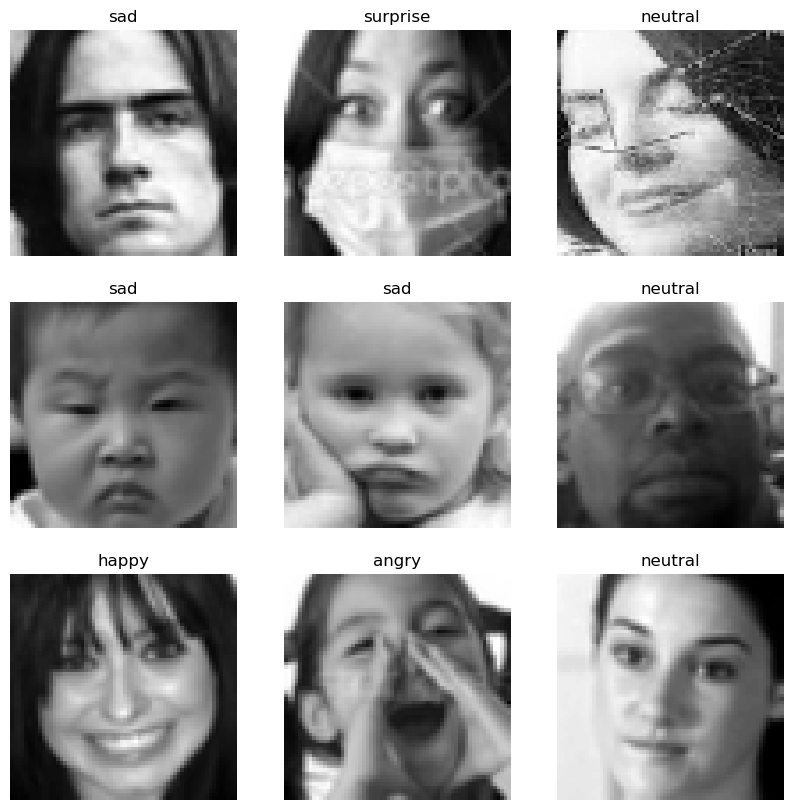

In [9]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        ax.imshow(images[i].numpy().astype("uint8")[:,:,0], cmap='gray')
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [10]:
# Build the Model

model = Sequential([
                  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,1)),
                  layers.Conv2D(32, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(64, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(128, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Dropout(0.2),
                  layers.Conv2D(256, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Dropout(0.2),
                  layers.Conv2D(512, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Dropout(0.2),
                  layers.Flatten(),
                  layers.Dense(256, activation='relu'),
                  layers.Dropout(0.2),  
                  layers.Dense(128, activation = 'relu'),
                  layers.Dropout(0.2),
                  layers.Dense(num_classes, activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=5,
                                                  mode='auto',
                                                  restore_best_weights=True
                                                 )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       7

In [11]:
epochs = 100
history = model.fit(train_ds, validation_data = val_ds, epochs = epochs, batch_size = batch_size, 
                    verbose = 2, callbacks=[early_stopping])

Epoch 1/100
867/867 - 182s - loss: 1.7060 - accuracy: 0.2837 - val_loss: 1.5357 - val_accuracy: 0.3923 - 182s/epoch - 210ms/step
Epoch 2/100
867/867 - 173s - loss: 1.4441 - accuracy: 0.4349 - val_loss: 1.2593 - val_accuracy: 0.5099 - 173s/epoch - 200ms/step
Epoch 3/100
867/867 - 167s - loss: 1.2900 - accuracy: 0.5033 - val_loss: 1.1439 - val_accuracy: 0.5666 - 167s/epoch - 192ms/step
Epoch 4/100
867/867 - 167s - loss: 1.1859 - accuracy: 0.5494 - val_loss: 1.0343 - val_accuracy: 0.6061 - 167s/epoch - 193ms/step
Epoch 5/100
867/867 - 167s - loss: 1.1127 - accuracy: 0.5789 - val_loss: 0.9916 - val_accuracy: 0.6301 - 167s/epoch - 193ms/step
Epoch 6/100
867/867 - 167s - loss: 1.0468 - accuracy: 0.6043 - val_loss: 0.8770 - val_accuracy: 0.6749 - 167s/epoch - 193ms/step
Epoch 7/100
867/867 - 167s - loss: 0.9901 - accuracy: 0.6293 - val_loss: 0.8327 - val_accuracy: 0.6962 - 167s/epoch - 193ms/step
Epoch 8/100
867/867 - 168s - loss: 0.9386 - accuracy: 0.6507 - val_loss: 0.7542 - val_accuracy: 0

867/867 - 173s - loss: 0.2368 - accuracy: 0.9209 - val_loss: 0.1335 - val_accuracy: 0.9678 - 173s/epoch - 199ms/step
Epoch 65/100
867/867 - 173s - loss: 0.2396 - accuracy: 0.9203 - val_loss: 0.1260 - val_accuracy: 0.9696 - 173s/epoch - 200ms/step
Epoch 66/100
867/867 - 172s - loss: 0.2319 - accuracy: 0.9228 - val_loss: 0.1312 - val_accuracy: 0.9698 - 172s/epoch - 199ms/step
Epoch 67/100
867/867 - 172s - loss: 0.2325 - accuracy: 0.9238 - val_loss: 0.1353 - val_accuracy: 0.9685 - 172s/epoch - 199ms/step
Epoch 68/100
867/867 - 173s - loss: 0.2241 - accuracy: 0.9245 - val_loss: 0.1322 - val_accuracy: 0.9685 - 173s/epoch - 199ms/step
Epoch 69/100
867/867 - 172s - loss: 0.2342 - accuracy: 0.9228 - val_loss: 0.1254 - val_accuracy: 0.9705 - 172s/epoch - 198ms/step
Epoch 70/100
867/867 - 174s - loss: 0.2232 - accuracy: 0.9260 - val_loss: 0.1292 - val_accuracy: 0.9693 - 174s/epoch - 201ms/step
Epoch 71/100
867/867 - 172s - loss: 0.2232 - accuracy: 0.9263 - val_loss: 0.1287 - val_accuracy: 0.9704

In [12]:
model_acc = model.evaluate(val_ds)[1]
model_acc

217/217 [==============================] - 8s 35ms/step - loss: 0.1233 - accuracy: 0.9693


0.9692685008049011

In [13]:
#Save the Model
model.save("Emotions Model")

INFO:tensorflow:Assets written to: Emotions Model\assets


INFO:tensorflow:Assets written to: Emotions Model\assets


In [14]:
#Load the Emotions Model
if not os.path.exists("Emotions Model/"):
    gdown.download("https://drive.google.com/uc?id=1easVnhBN9o1s60_eAyl8CGj_LHuPoXgc", file_path)
    gdown.extractall(file_path)
    if os.path.exists(file_path):
        os.remove(file_path)
emotions_model = keras.models.load_model('Emotions Model/')
testData = tf.keras.preprocessing.image_dataset_from_directory(
    "Test Set/Emotions",
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    seed=123456,
    image_size=(img_height,img_width),
    batch_size=1000)


predictions = np.array([])
labels =  np.array([])
for x, y in testData:
    predictions = np.concatenate([predictions, np.argmax(emotions_model.predict(x), axis = -1)])
    labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

Found 433 files belonging to 7 classes.
14/14 [==============================] - 0s 15ms/step


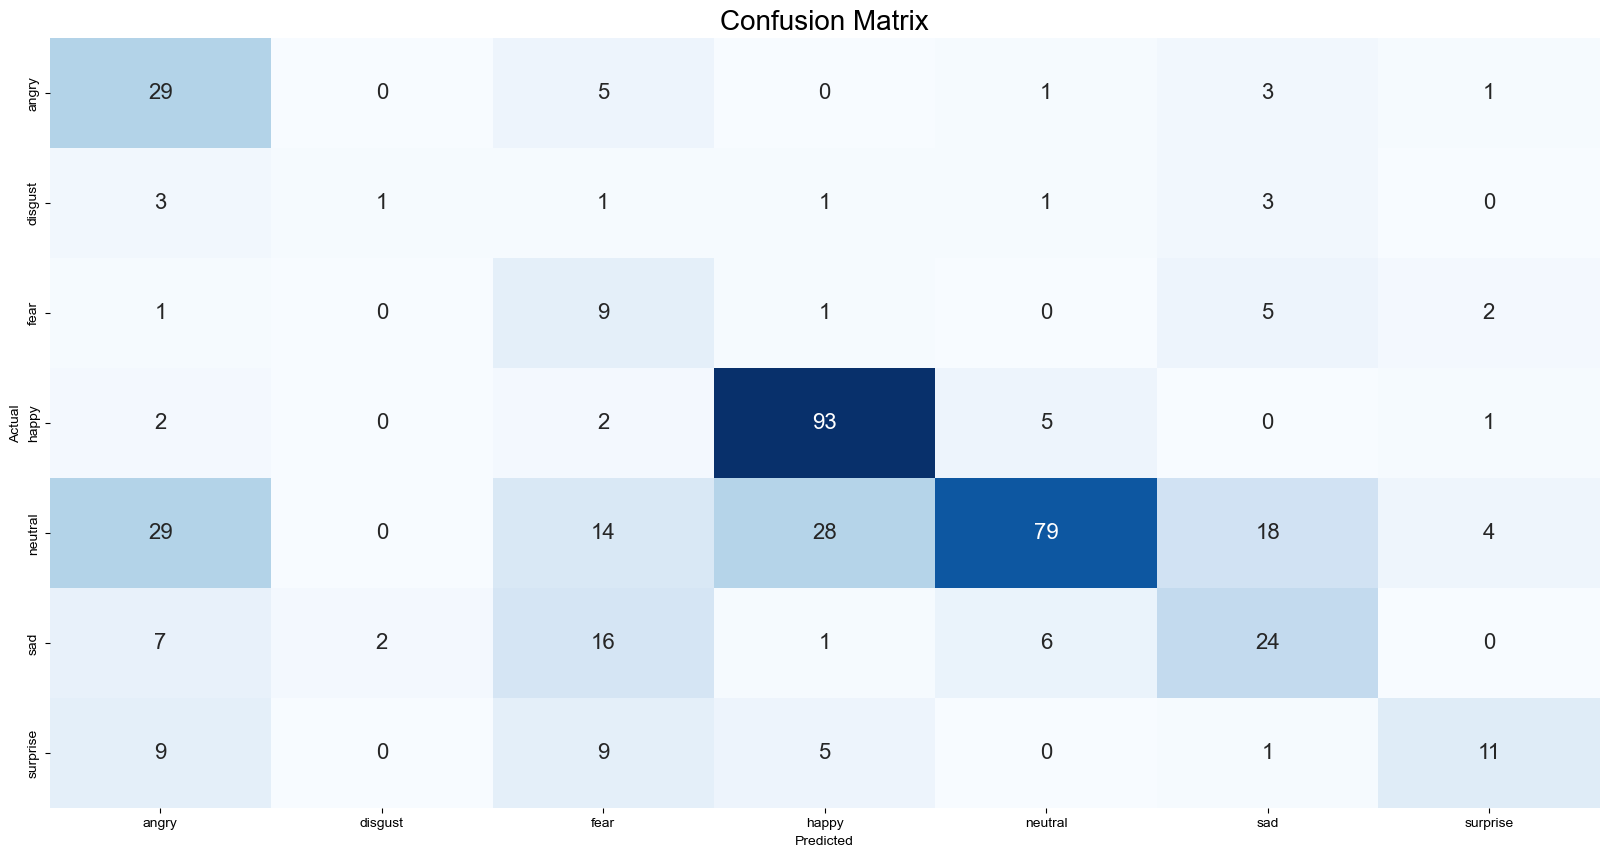

In [15]:
cm_data = confusion_matrix(labels , predictions)
cm = pd.DataFrame(cm_data, columns=class_names, index = class_names)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (20,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

In [16]:
print(classification_report(labels, predictions))

              precision    recall  f1-score   support

         0.0       0.36      0.74      0.49        39
         1.0       0.33      0.10      0.15        10
         2.0       0.16      0.50      0.24        18
         3.0       0.72      0.90      0.80       103
         4.0       0.86      0.46      0.60       172
         5.0       0.44      0.43      0.44        56
         6.0       0.58      0.31      0.41        35

    accuracy                           0.57       433
   macro avg       0.49      0.49      0.45       433
weighted avg       0.66      0.57      0.58       433

